In [1]:
# conda activate statsmodels

import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

# 1. comparions of psth features for cluster_id and mouse_id

In [3]:
df_psth=pd.read_csv('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/population_psth_properties_RF_alltrials_removedlow_corrected.csv', index_col=0)

In [4]:
df_psth.head()

,width,height,time,cluster_id,mouse_id
0,27.502970,15.988882,76.0,cluster2,306046
1,24.683711,19.704145,76.0,cluster2,306046
2,22.674816,17.971564,64.0,cluster2,306046
3,12.473573,15.156656,62.0,cluster2,306046
4,16.397502,17.239004,68.0,cluster2,306046


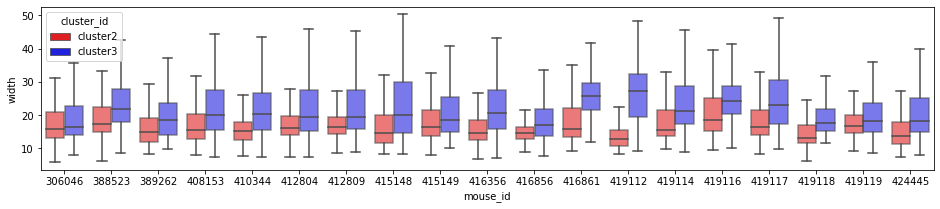

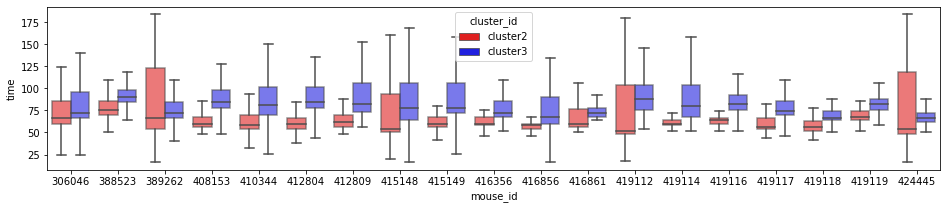

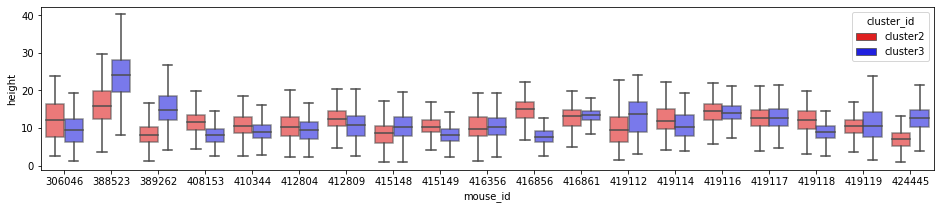

In [5]:
plt.figure(figsize=(16,3))
sns.boxplot(x="mouse_id", y="width", hue="cluster_id", 
            data=df_psth, 
            palette=['r','b'], 
            boxprops=dict(alpha=.6),
           showfliers=False)

plt.figure(figsize=(16,3))
sns.boxplot(x="mouse_id", y="time", hue="cluster_id", 
            data=df_psth, 
            palette=['r','b'], 
            boxprops=dict(alpha=.6),
           showfliers=False)

plt.figure(figsize=(16,3))
sns.boxplot(x="mouse_id", y="height", hue="cluster_id", 
            data=df_psth, 
            palette=['r','b'], 
            boxprops=dict(alpha=.6),
            showfliers=False)


## apply 2-way anova consider interaction between mouse and cluster factors

In [6]:
df_new = df_psth.dropna()

In [7]:
formula = 'width ~ C(cluster_id) + C(mouse_id) + C(cluster_id):C(mouse_id)'
model = ols(formula, df_new).fit()
aov_table = anova_lm(model, typ=2)

In [8]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                                  sum_sq       df            F         PR(>F)  \
C(cluster_id)               70353.112074      1.0  1278.506473  4.032514e-266   
C(mouse_id)                 30161.491483     18.0    30.450886  2.409158e-102   
C(cluster_id):C(mouse_id)   16453.966636     18.0    16.611839   3.988375e-52   
Residual                   658129.808529  11960.0          NaN            NaN   

                             eta_sq  omega_sq  
C(cluster_id)              0.090767  0.090689  
C(mouse_id)                0.038913  0.037633  
C(cluster_id):C(mouse_id)  0.021228  0.019949  
Residual                        NaN       NaN  


# 2. comparison of MI for cluster and area

In [9]:
df_mi = pd.read_csv('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/modulation_index_individual.csv', index_col=0)

In [10]:
df_mi.head()

,mouse_id,probe_id,unit_id,channel_id,cluster,MI
0,306046,probeA,341.0,123,1.0,0.483490
1,306046,probeA,332.0,125,1.0,0.815544
2,306046,probeA,322.0,129,1.0,0.586609
3,306046,probeA,330.0,139,1.0,2.100634
4,306046,probeA,321.0,153,1.0,0.647929


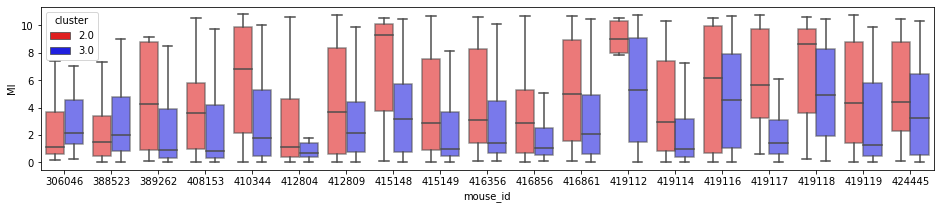

In [11]:
plt.figure(figsize=(16,3))
sns.boxplot(x="mouse_id", y="MI", hue="cluster", 
            data=df_mi[df_mi.cluster!=1], 
            palette=['r','b'], 
            boxprops=dict(alpha=.6),
           showfliers=False)


In [12]:
formula = 'MI ~ C(mouse_id) + C(cluster) + C(mouse_id):C(cluster)'
model = ols(formula, df_mi[df_mi.cluster!=1]).fit()
aov_table = anova_lm(model, typ=2)

In [13]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                              sum_sq      df           F        PR(>F)  \
C(mouse_id)              1993.740058    18.0    9.885022  7.736648e-27   
C(cluster)               1415.201131     1.0  126.298961  2.322688e-28   
C(mouse_id):C(cluster)    459.454312    18.0    2.277988  1.663468e-03   
Residual                19956.404960  1781.0         NaN           NaN   

                          eta_sq  omega_sq  
C(mouse_id)             0.083683  0.075182  
C(cluster)              0.059400  0.058902  
C(mouse_id):C(cluster)  0.019285  0.010814  
Residual                     NaN       NaN  


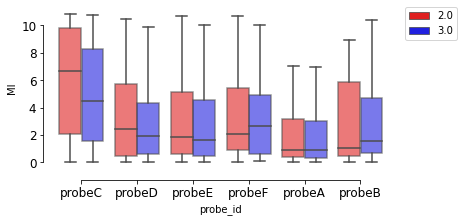

In [14]:
cluster_color=['red', 'blue']

plt.figure(figsize=(6,3))
b = sns.boxplot(x="probe_id", y='MI',
            hue="cluster", palette=cluster_color,
            data=df_mi[df_mi.cluster!=1],
               boxprops=dict(alpha=.6),
               showfliers=False) #[(df_all.type!='bad') & (df_all.p_val<0.1)]
sns.despine(offset=10, trim=True)
b.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [15]:
formula = 'MI ~ C(probe_id) + C(cluster) + C(probe_id):C(cluster)'
model = ols(formula, df_mi[df_mi.cluster!=1]).fit()
aov_table = anova_lm(model, typ=2)

In [16]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                              sum_sq      df          F        PR(>F)  \
C(probe_id)              2865.031098     5.0  53.136311  1.420010e-51   
C(cluster)                136.507070     1.0  12.658645  3.834784e-04   
C(probe_id):C(cluster)     58.416138     5.0   1.083415  3.675287e-01   
Residual                19486.152093  1807.0        NaN           NaN   

                          eta_sq  omega_sq  
C(probe_id)             0.127074  0.124623  
C(cluster)              0.006055  0.005574  
C(probe_id):C(cluster)  0.002591  0.000199  
Residual                     NaN       NaN  


# 3. Compare divergence and convergence degree between clusters across areas

In [28]:
df=pd.read_csv('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/div_conv_threshold0.csv', index_col=0)

In [29]:
formula = 'div ~ C(cluster) + C(probe_id) + C(cluster):C(probe_id)'
model = ols(formula, df[df.cluster!=1]).fit()
aov_table = anova_lm(model, typ=2)

In [30]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                           sum_sq      df            F         PR(>F)  \
C(cluster)              12.703801     1.0  1029.487093  5.412573e-184   
C(probe_id)              2.181638     5.0    35.358994   7.924949e-35   
C(cluster):C(probe_id)   0.223266     5.0     3.618600   2.911492e-03   
Residual                25.778117  2089.0          NaN            NaN   

                          eta_sq  omega_sq  
C(cluster)              0.310706  0.310311  
C(probe_id)             0.053358  0.051833  
C(cluster):C(probe_id)  0.005461  0.003950  
Residual                     NaN       NaN  


In [32]:
formula = 'conv ~ C(cluster) + C(probe_id) + C(cluster):C(probe_id)'
model = ols(formula, df[df.cluster!=1]).fit()
aov_table = anova_lm(model, typ=2)

In [33]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                           sum_sq      df            F         PR(>F)  \
C(cluster)              12.705309     1.0  1029.531359  5.332840e-184   
C(probe_id)              2.180913     5.0    35.344571   8.188274e-35   
C(cluster):C(probe_id)   0.223183     5.0     3.616982   2.921449e-03   
Residual                25.780070  2089.0          NaN            NaN   

                          eta_sq  omega_sq  
C(cluster)              0.310723  0.310328  
C(probe_id)             0.053337  0.051812  
C(cluster):C(probe_id)  0.005458  0.003948  
Residual                     NaN       NaN  


In [34]:
df=pd.read_csv('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/div_conv_shuffle_nothreshold.csv', index_col=0)

In [35]:
formula = 'div ~ C(cluster) + C(probe_id) + C(cluster):C(probe_id)'
model = ols(formula, df[df.cluster!=1]).fit()
aov_table = anova_lm(model, typ=2)

In [36]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                           sum_sq      df            F         PR(>F)  \
C(cluster)              19.932010     1.0  1483.247745  1.150061e-245   
C(probe_id)              0.039395     5.0     0.586318   7.105249e-01   
C(cluster):C(probe_id)   0.071467     5.0     1.063645   3.786264e-01   
Residual                28.072160  2089.0          NaN            NaN   

                          eta_sq  omega_sq  
C(cluster)              0.414257  0.413863  
C(probe_id)             0.000819 -0.000578  
C(cluster):C(probe_id)  0.001485  0.000089  
Residual                     NaN       NaN  


In [37]:
formula = 'conv ~ C(cluster) + C(probe_id) + C(cluster):C(probe_id)'
model = ols(formula, df[df.cluster!=1]).fit()
aov_table = anova_lm(model, typ=2)

In [38]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                           sum_sq      df            F         PR(>F)  \
C(cluster)              19.933657     1.0  1483.303733  1.131374e-245   
C(probe_id)              0.039344     5.0     0.585539   7.111246e-01   
C(cluster):C(probe_id)   0.071401     5.0     1.062623   3.792097e-01   
Residual                28.073421  2089.0          NaN            NaN   

                          eta_sq  omega_sq  
C(cluster)              0.414268  0.413873  
C(probe_id)             0.000818 -0.000579  
C(cluster):C(probe_id)  0.001484  0.000087  
Residual                     NaN       NaN  


In [ ]:
# 4. layer and area comparison

In [39]:
layers = np.load('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/data/layer_distribution.npy')

In [4]:
layers.shape

(100, 2, 3)

In [5]:
df=pd.DataFrame()
data = np.concatenate([layers[:,0,0], layers[:,0,1], layers[:,0,2], layers[:,1,0], layers[:,1,1],layers[:,1,2]], axis=0)

In [6]:
df['cluster'] = np.concatenate([np.ones(300)*2, np.ones(300)*3], axis=0)

In [7]:
df['depth'] = np.concatenate([np.ones(100)*1, np.ones(100)*2, np.ones(100)*3, np.ones(100)*1, np.ones(100)*2, np.ones(100)*3,], axis=0)

In [8]:
df['proportion']=data

In [9]:
formula = 'proportion ~ C(cluster) + C(depth) + C(cluster):C(depth)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)

In [10]:
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                           sum_sq     df             F    PR(>F)  \
C(cluster)           8.135128e-29    1.0  1.512668e-24  1.000000   
C(depth)             1.296146e-03    2.0  1.205045e+01  0.000007   
C(cluster):C(depth)  5.946309e+00    2.0  5.528366e+04  0.000000   
Residual             3.194531e-02  594.0           NaN       NaN   

                           eta_sq  omega_sq  
C(cluster)           1.360492e-29 -0.000009  
C(depth)             2.167631e-04  0.000199  
C(cluster):C(depth)  9.944408e-01  0.994414  
Residual                      NaN       NaN  


In [16]:
np.nanmean(df[(df.cluster==3) & (df.depth==1)].proportion.values)

0.46889264927537044

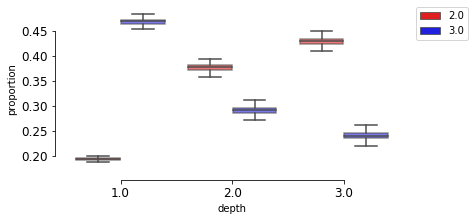

In [17]:
cluster_color=['red', 'blue']

plt.figure(figsize=(6,3))
b = sns.boxplot(x="depth", y='proportion',
            hue="cluster", palette=cluster_color,
            data=df,
               boxprops=dict(alpha=.6),
               showfliers=False) #[(df_all.type!='bad') & (df_all.p_val<0.1)]
sns.despine(offset=10, trim=True)
b.tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df[(df.cluster==2) & (df.depth==1)].proportion, 
                                df[(df.cluster==2) & (df.depth==2)].proportion, 
                               df[(df.cluster==2) & (df.depth==3)].proportion, )
print(fvalue, pvalue)

34187.37022918407 0.0


In [21]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df[(df.cluster==3) & (df.depth==1)].proportion, 
                                df[(df.cluster==3) & (df.depth==2)].proportion, 
                               df[(df.cluster==3) & (df.depth==3)].proportion, )
print(fvalue, pvalue)

22983.909390548877 0.0
